In [1]:
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
# Remoção de colunas com mais de 50% de valores faltantes
df = pd.read_csv("futebol.csv")
limite = len(df) * 0.5  # número mínimo de valores não nulos exigidos
df = df.dropna(axis=1, thresh=limite)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8453 entries, 0 to 8452
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ano_campeonato                  8453 non-null   int64  
 1   data                            8453 non-null   object 
 2   rodada                          8453 non-null   int64  
 3   estadio                         8442 non-null   object 
 4   arbitro                         6743 non-null   object 
 5   publico                         6742 non-null   float64
 6   time_mandante                   8453 non-null   object 
 7   time_visitante                  8453 non-null   object 
 8   tecnico_mandante                6299 non-null   object 
 9   tecnico_visitante               6299 non-null   object 
 10  colocacao_mandante              6743 non-null   float64
 11  colocacao_visitante             6743 non-null   float64
 12  valor_equipe_titular_mandante   63

Média: 2.55
Mediana: 2.0
Moda: [2.0]
Desvio padrão: 1.63
IQR: 3.0


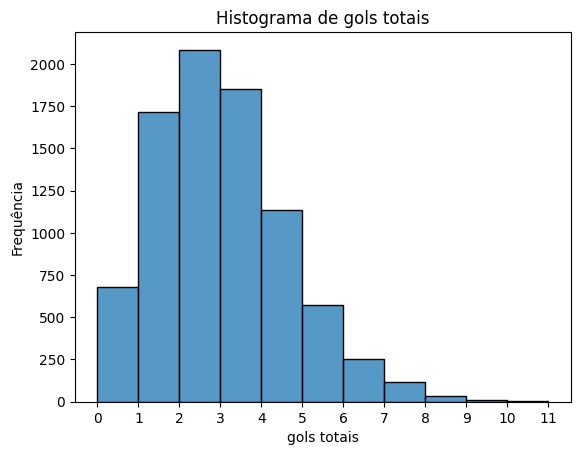

In [33]:
# 1. Distribuição de gols
df["gols_total"] = df["gols_mandante"] + df["gols_visitante"]


gols_tot = df["gols_total"]
num_bins = int(gols_tot.max())

sns.histplot(gols_tot, bins=num_bins, kde=False)
plt.xlabel("gols totais")
plt.ylabel("Frequência")
plt.title("Histograma de gols totais")
plt.xticks(np.arange(gols_tot.min(), gols_tot.max() + 1))

media = gols_tot.mean()
mediana = gols_tot.median()
moda = gols_tot.mode().to_list()
desvio = gols_tot.std()
q1 = gols_tot.quantile(0.25)
q3 = gols_tot.quantile(0.75)
iqr = q3 - q1

print(f'Média: {media:.2f}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda}')
print(f'Desvio padrão: {desvio:.2f}')
print(f'IQR: {iqr}')

plt.show()




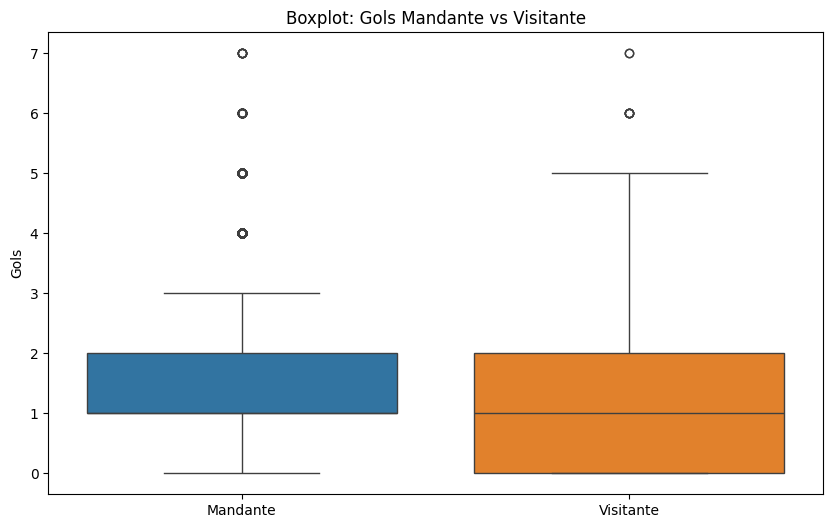

In [ ]:
# 2 Mando de campo
gols_mand = df["gols_mandante"]
gols_vist = df["gols_visitante"]

plt.figure(figsize=(10,6))
sns.boxplot(data=[gols_mand, gols_vist])
plt.title('Boxplot: Gols Mandante vs Visitante')
plt.ylabel('Gols')
plt.xticks([0,1], ['Mandante', 'Visitante'])

q1m = gols_mand.quantile(0.25)
q3m = gols_mand.quantile(0.75)

q1v = gols_vist.quantile(0.25)
q3v = gols_vist.quantile(0.75)

iqrm = q3m - q1m
iqrv = q3v - q1v

limite_inf_m = q1m - 1.5 * iqrm
limite_sup_m = q3m + 1.5 * iqrm

limite_inf_v = q1v - 1.5 * iqrv
limite_sup_v = q3v + 1.5 * iqrv

outliersm = gols_mand[(gols_mand < limite_inf_m) | (gols_mand > limite_sup_m)]
outliersv = gols_mand[(gols_mand < limite_inf_v) | (gols_mand > limite_sup_v)]

df_outliers = pd.DataFrame({
    "Outliers_Mandante": outliersm,
    "Outliers_Visitante": outliersv
})

print(df_outliers)

plt.show()